## **Testing LightNet using toydataset**

#### This is the same dataset which was used to train a self implemented perceptron class earlier.

In [3]:
import sys
sys.path.append("D:\Development\Machine_Learning\ML_Algorithms\coursera-2\Week-2\Computational_graphs")

In [4]:
import LightNet as ln
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization

### **Creating the input dataset**

(100, 2)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 8 70 82 28 63  0  5 50 81  4 23 65 76 60 24 42 77 38 56 75 35 88 19 29
 31 91 85  9 53 41 21 90 33 69 84 87 95 97 62 12 20 89 37 59  1 74 11 79
 14 54 16 26 51 45  6 98 30 44 72 43 15 94 18 13 22 10 58 71 64  3 40 34
 27 52  7 48 61 93 99 39  2 67 55 49 68 80 36 78 96 25 46 32 73 47 86 57
 83 17 92 66]


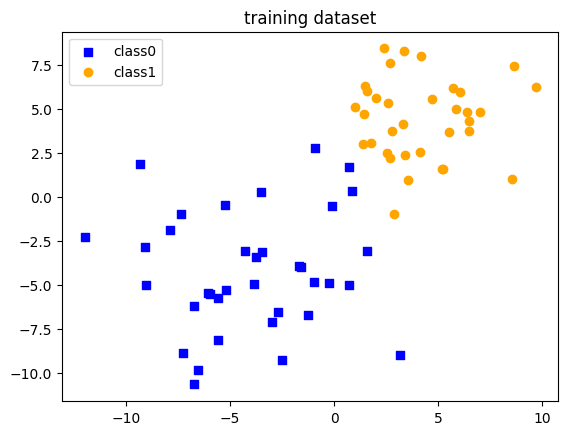

In [5]:
data=np.loadtxt("perceptron_toydataset.txt")
x,y=data[:,:2], data[:,2]
print(x.shape)

#shuffle index array corresponds to the indices of x and y
#every time this block is run the same shuffling will happen as the seed is same
shuffle_index=np.arange(0,x.shape[0],1)
print(shuffle_index)
shuffle_rng=np.random.RandomState(123) # a random number generator object
shuffle_rng.shuffle(shuffle_index)
print(shuffle_index)

#splitting in the ratio 7:3
# x and y are now shuffled randomly, ready to be split
x,y=x[shuffle_index],y[shuffle_index] 
x_train, y_train, x_test, y_test= x[:70],y[:70],x[70:100], y[70:100]

#normalising the training data
mu1,sig1=np.mean(x_train[:, 0]), np.std(x_train[:,0])
x_train[:,0]=(x_train[:,0]-mu1)*sig1
mu2,sig2=np.mean(x_train[:, 1]), np.std(x_train[:, 1])
x_train[:,1]=(x_train[:,1]-mu2)*sig2

#normalising the test data
x_test[:,0]=(x_test[:,0]-mu1)*sig1
x_test[:,1]=(x_test[:,1]-mu2)*sig2

plt.scatter(x_train[y_train==0, 0],x_train[y_train==0, 1], color='blue', marker='s', label="class0")
plt.scatter(x_train[y_train==1, 0],x_train[y_train==1, 1], color='orange', marker='o', label="class1")
plt.title("training dataset")
plt.legend()


### **Testing a single sigmoid neuron from LightNet to fit the above toy data** 

In [6]:
model=ln.Network([(2,),
               ln.Layer(units=1, activation='sigmoid', label='L1')])

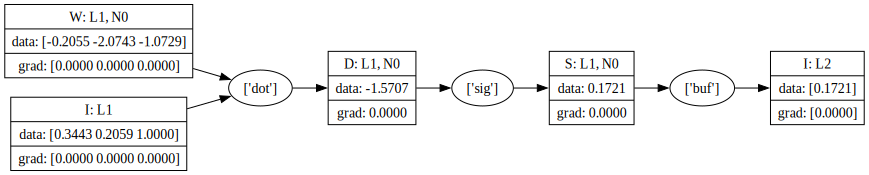

In [7]:
model.draw()    #initialised network

In [8]:
model.train(x_train, y_train,10, .1)

Node: data=[9.1516], label='Loss', op='['BCE']'
Node: data=[9.4706], label='Loss', op='['BCE']'
Node: data=[7.7512], label='Loss', op='['BCE']'
Node: data=[1.0886], label='Loss', op='['BCE']'
Node: data=[2.3671], label='Loss', op='['BCE']'
Node: data=[0.1700], label='Loss', op='['BCE']'
Node: data=[0.0733], label='Loss', op='['BCE']'
Node: data=[0.0157], label='Loss', op='['BCE']'
Node: data=[0.0070], label='Loss', op='['BCE']'
Node: data=[0.0065], label='Loss', op='['BCE']'
Node: data=[0.0017], label='Loss', op='['BCE']'
Node: data=[0.0302], label='Loss', op='['BCE']'
Node: data=[0.1511], label='Loss', op='['BCE']'
Node: data=[0.0430], label='Loss', op='['BCE']'
Node: data=[6.2923e-05], label='Loss', op='['BCE']'
Node: data=[0.9968], label='Loss', op='['BCE']'
Node: data=[0.0661], label='Loss', op='['BCE']'
Node: data=[0.0002], label='Loss', op='['BCE']'
Node: data=[0.0074], label='Loss', op='['BCE']'
Node: data=[0.0030], label='Loss', op='['BCE']'
Node: data=[0.0159], label='Loss', o

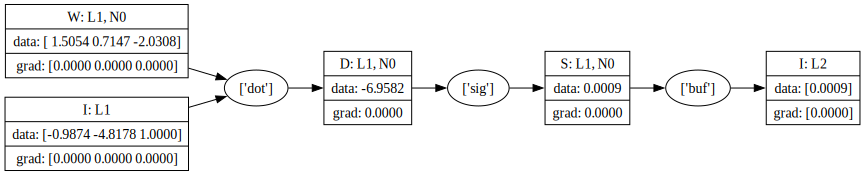

In [9]:
model.draw()    #weights after training

In [10]:
model.get_weights()     #trained weights

L1
Weights: 
[[ 1.50541569  0.71471177 -2.03079932]]


In [11]:
# compairing model outputs to actual outputs

for i in range(x_test.shape[0]):
    print(model(x_test[i]).data, y_test[i])

[4.72267406e-07] 0.0
[2.29361958e-07] 0.0
[3.46784035e-05] 0.0
[0.99867178] 1.0
[0.00026081] 0.0
[0.00090607] 0.0
[0.99997496] 1.0
[0.97769522] 1.0
[0.99999995] 1.0
[3.84893893e-06] 0.0
[0.0107088] 0.0
[0.9982747] 1.0
[0.99999975] 1.0
[6.83161555e-05] 0.0
[0.99988054] 1.0
[0.99985944] 1.0
[0.00019853] 0.0
[0.99992313] 1.0
[0.99538618] 1.0
[5.27665107e-07] 0.0
[0.00037051] 0.0
[1.39612038e-05] 0.0
[0.99790315] 1.0
[0.00040557] 0.0
[0.999905] 1.0
[0.99959291] 1.0
[0.82174741] 1.0
[4.08341374e-06] 0.0
[0.99902984] 1.0
[0.99451629] 1.0


In [12]:
model.score(x_test, y_test)

1.0

### **Plotting the desicion boundry**

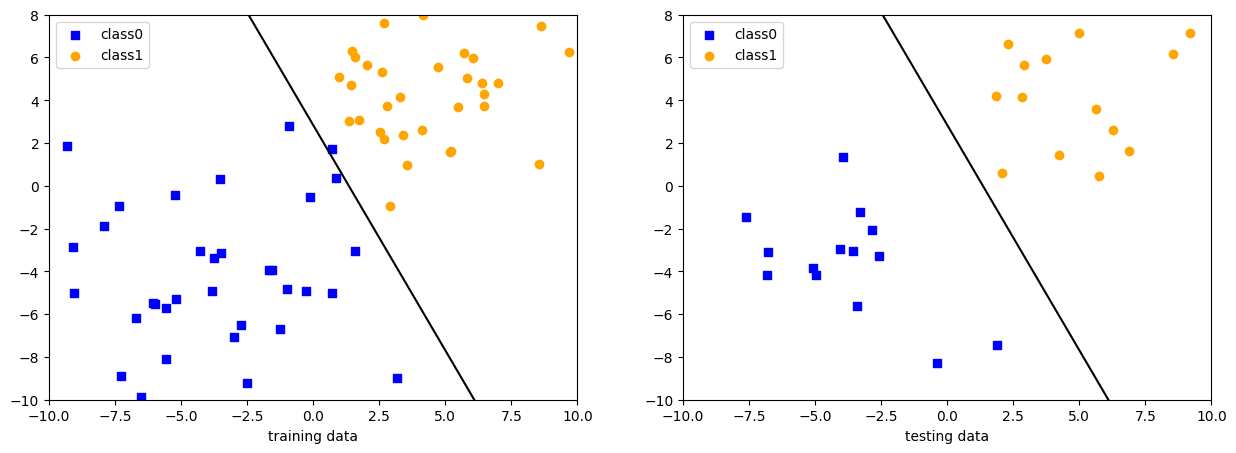

In [13]:
fig, ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_xlabel("training data")
ax[0].axis([-10,10,-10,8])
ax[1].set_xlabel("testing data")
ax[1].axis([-10,10,-10,8])

ax[0].scatter(x_train[y_train==0, 0],x_train[y_train==0, 1], color='blue', marker='s', label="class0")
ax[0].scatter(x_train[y_train==1, 0],x_train[y_train==1, 1], color='orange', marker='o', label="class1")
ax[0].legend()

ax[1].scatter(x_test[y_test==0, 0],x_test[y_test==0, 1], color='blue', marker='s', label="class0")
ax[1].scatter(x_test[y_test==1, 0],x_test[y_test==1, 1], color='orange', marker='o', label="class1")
ax[1].legend()

weights=model.layers[1].neuron_list[0].weights.data
X=np.arange(-10,10,.5)
Y=-(X*weights[0]+weights[2])/weights[1]

ax[0].plot(X,Y, color='black')
ax[1].plot(X,Y, color='black')